# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

一个神经元接受输入(权重WT、样本X、偏置b)，根据WT*X+b计算，然后传给一个激活函数(e.g:sigmoid,tanh,Relu,Leaky Relu)得到输出

####  2. Why we use non-linear activation funcitons in neural networks?

如果使用线性激活函数，神经网络的多层就没有意义，因为每层都是线性激活函数，多层激活函数可以合并成一层激活函数

#### 3. What is the 'Logistic Loss' ?

单个训练实例的成本的损失函数：
$$L = -[y*\log(\hat{y})+(1-y)\log(1-\hat{y})]$$

训练集上的逻辑斯特损失函数：
$$L=\frac{-1}{m}\sum_{i=1}^{m}[y^i*\log(\hat{y}^i)+(1-y^i)\log(1-\hat{y}^i)]$$

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

C

#### 5. Why we don't use zero initialization for all parameters ?

因为所有参数舒适化为0，会导致神经网络同一层各结点输出结果一样，导致对称性问题，即每一层内所有结点效果一样，

#### 6. Can you implement the softmax function using python ? 

In [401]:
#softmax function
import numpy as np

def softmax(logists):
    exps = np.exp(logists)
    exp_sum = np.sum(exps, axis = 1, keepdims = True) #按行相加，保持矩阵纬度，适用于2维以上
    return exps / exp_sum

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [364]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [365]:
# Loading the data 
digits = datasets.load_digits()

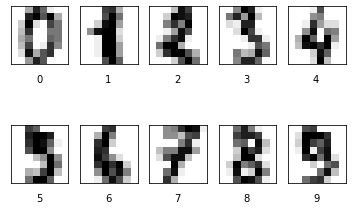

In [366]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [368]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [369]:
from sklearn.preprocessing import MinMaxScaler

In [400]:
#对训练集归一化(0,1)范围
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [371]:
X_train

array([[0.    , 0.125 , 0.8125, ..., 0.875 , 0.1875, 0.    ],
       [0.    , 0.    , 0.    , ..., 0.125 , 0.    , 0.    ],
       [0.    , 0.    , 0.375 , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.375 , ..., 0.1875, 0.    , 0.    ],
       [0.    , 0.125 , 0.5625, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.    , 0.    , 0.    ]])

In [372]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.
y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [373]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [374]:
print(type(y_train))

<class 'numpy.ndarray'>


#### 3- Architecture of the neural network

![title](./networks.png)

In [11]:
pwd

'C:\\Users\\aceryoung\\Downloads\\NLP\\02\\0202\\作业\\Assignment_4'

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [375]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1 / (1+ np.exp(np.dot(-1, z)))
    
    return s

In [402]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid([0,2])))

sigmoid([0,2]) = [0.5        0.88079708]


In [377]:
sigmoid([0,2,3])

array([0.5       , 0.88079708, 0.95257413])

##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [378]:
# Random innitialize the parameters
import random
def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim,1)
    b = random.random()
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$     
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [379]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

In [380]:
X_train

array([[0.    , 0.125 , 0.8125, ..., 0.875 , 0.1875, 0.    ],
       [0.    , 0.    , 0.    , ..., 0.125 , 0.    , 0.    ],
       [0.    , 0.    , 0.375 , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.375 , ..., 0.1875, 0.    , 0.    ],
       [0.    , 0.125 , 0.5625, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.    , 0.    , 0.    ]])

In [381]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[0]
    A = sigmoid(np.dot(X,w) + b)                  
    cost = -np.mean(np.sum((Y * np.log(A)) + (1-Y)* np.log(1-A)))
    #print(A.shape)
    
    dw = 1 / m * np.dot(X.T, (A-Y.reshape(-1,1)))
    db = 1 / m * np.sum(A - Y.reshape(-1,1))
    #print(dw.shape)
    #print(w.shape)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [382]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [383]:
X_test.shape[1]

64

In [384]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[1],1)
    
    A = sigmoid(np.dot(X,w) + b)
    
    for i in range(A.shape[1]):
        A[A<=0.5] = 0
        A[A>0.5] = 1
        Y_prediction = A.reshape(1,m)
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [426]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost = True):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": training_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    d = {}
    dim = X_train.shape[1]
    w,b = initialize_parameters(dim) 
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    Y_prediction = predict(w, b, X_test)
    
    training_accuracy = np.mean( predict(w, b, X_train)== Y_train.reshape(1,-1))
    test_accuracy = np.mean(Y_prediction == Y_test.reshape(1,-1))
    
    d['w'] = params['w']
    d['b'] = params['b']
    d['training_accuracy'] = training_accuracy
    d['test_accuracy'] = test_accuracy
    d['cost'] = costs
    return d 

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

In [135]:
import matplotlib.pyplot as plt

In [276]:
learning_rates = [i*1e-2 for i in range(1,21)]

In [277]:
training_accuracys = []
for learning_rate in learning_rates:
    result = model(X_train, y_train, X_test, y_test,1000,learning_rate = learning_rate , print_cost = False)
    training_accuracys.append(result['training_accuracy'])
    

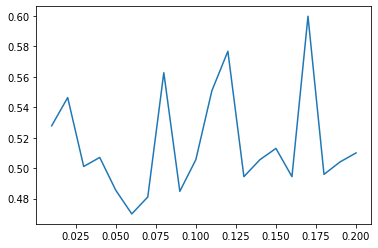

In [279]:
plt.plot(learning_rates,training_accuracys)

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [386]:
iteration_nums = [i for i in range(100,2000,100)]

In [387]:
test_accuracys = []
for iteration_num in iteration_nums:
    result = model(X_train, y_train, X_test, y_test,iteration_num,learning_rate = 1e-2, print_cost = False)
    test_accuracys.append(result['test_accuracy'])

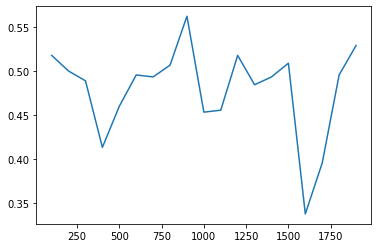

In [388]:
plt.plot(iteration_nums,test_accuracys)

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

In [408]:
# Split the data into training set and test set 
X_train_, X_test_, y_train_, y_test_ = train_test_split(digits.data, digits.target, test_size=0.25)

In [409]:
y_train.reshape(-1,1).shape

(1347, 1)

scaler = MinMaxScaler()
scaler.fit(X_train_)
X_train_ = scaler.transform(X_train_)

In [458]:
# Random innitialize the parameters
import random
def initialize_parameters_(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim,10)
    b = random.random()
    
    assert(w.shape == (dim,10))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [459]:
def one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m,n_classes))
    Y_one_hot[np.arange(m),y] = 1
    return Y_one_hot

In [460]:
one_hot(y_train_)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

$$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$$

In [461]:
def propagate_(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[0]
    A = softmax(np.dot(X,w) + b)
    one_hot_Y = one_hot(Y)
    cost = np.mean(np.sum(one_hot_Y*(np.log(A)),axis = 1))
    error = A - one_hot_Y
    #print(A.shape)
    
    dw = 1 / m * np.dot(X.T,error)
    db = 1 / m * error
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [462]:
def optimize_(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate_(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

In [463]:
def predict_(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
   
    w = w.reshape(X.shape[1],10)  #64*10
    
    A = softmax(np.dot(X,w) + b)    #1364*10
    
   
    Y_prediction= np.argmax(A, axis = 1)
    
    return Y_prediction

In [464]:
def model_(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost = True):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": training_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    d = {}
    dim = X_train.shape[1]
    w,b = initialize_parameters_(dim) 
    params, grads, costs = optimize_(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    Y_prediction = predict_(w, b, X_test)
    
    training_accuracy = np.mean( predict_(w, b, X_train)== Y_train.reshape(-1,1))
    test_accuracy = np.mean(Y_prediction == Y_test.reshape(-1,1))
    print(Y_prediction)
    d['w'] = params['w']
    d['b'] = params['b']
    d['training_accuracy'] = training_accuracy
    d['test_accuracy'] = test_accuracy
    d['cost'] = costs
    return d 

In [466]:
model_(X_train_, y_train_, X_test_, y_test_, 5000, 1e-1,print_cost = False)

[5 1 4 2 5 2 5 4 4 5 5 4 4 4 5 4 4 5 4 4 5 1 2 1 7 1 7 4 7 5 2 5 4 4 7 4 1
 4 4 5 7 1 7 4 4 1 7 5 5 5 3 2 3 5 1 5 1 7 5 5 5 2 3 4 1 4 2 4 4 5 4 1 4 4
 2 4 1 1 7 4 4 1 2 1 7 1 3 1 2 7 2 3 4 4 4 4 5 4 7 4 4 1 7 2 1 4 1 4 5 5 4
 7 4 7 7 1 4 5 5 7 4 2 1 4 1 4 4 4 7 7 5 3 4 5 7 4 1 4 3 3 1 3 1 4 5 7 4 4
 4 3 4 4 7 4 1 5 4 4 2 4 7 7 4 1 2 1 7 2 3 1 5 7 7 1 4 4 7 3 2 5 5 4 4 1 1
 5 4 1 4 3 3 4 4 7 4 2 4 1 3 5 4 4 1 4 5 1 7 4 5 1 3 4 7 4 4 4 4 4 4 4 3 4
 1 2 1 4 7 7 4 7 1 1 4 2 5 4 3 2 1 4 4 7 2 4 7 4 7 5 7 2 7 4 4 4 7 4 2 1 5
 2 2 7 4 5 4 5 5 4 4 2 1 4 4 5 4 4 4 7 5 1 4 7 5 1 2 7 4 4 1 4 1 4 1 1 5 1
 7 7 5 2 1 1 2 3 4 1 7 4 1 5 5 4 3 2 5 2 1 7 4 1 4 4 1 4 1 4 4 5 1 7 1 1 1
 5 4 4 1 4 4 4 5 7 7 1 7 1 4 4 1 4 1 7 4 1 3 4 1 5 4 7 5 5 1 5 4 5 7 4 3 5
 7 7 5 4 7 4 2 4 1 2 4 3 1 5 1 5 7 4 5 7 4 5 3 1 2 7 4 1 7 5 5 5 7 1 1 1 7
 7 4 7 2 5 7 2 1 1 1 4 4 4 2 4 7 7 4 7 2 4 1 4 7 7 4 4 7 7 1 5 7 1 7 7 4 3
 1 5 2 4 4 7]


{'w': array([[ 5.63997261e-01,  6.16583373e-01,  3.94262628e-01,
         -3.39074474e-01, -4.57377700e-01,  1.75789487e+00,
         -9.43002130e-01, -1.57939435e-01, -3.63511394e-01,
         -2.08320242e-01],
        [-1.04348672e+00, -2.09039805e+00,  9.42872159e-02,
         -5.90323945e-01,  9.20523698e-01,  1.57244260e+00,
         -2.32104174e-01, -1.45009170e-02, -1.38950992e-01,
         -7.65340562e-01],
        [ 1.00350131e+00, -2.93235432e-01,  1.06109062e+00,
          1.39915728e+00,  9.54554690e-01,  6.63622696e-01,
         -1.20754990e+00, -5.71610290e-01, -1.74445979e-01,
         -5.44244297e-01],
        [ 9.72969449e-01,  1.52748452e-03, -5.17837825e-01,
          1.11714565e+00, -2.47633441e+00, -3.65690122e-01,
         -7.15998850e-01,  1.84042526e+00, -2.42169359e-01,
          1.18801390e+00],
        [-7.94368321e-01, -1.79987056e+00,  3.44487091e-01,
          2.81356357e-01, -1.34789389e+00,  7.26078819e-01,
         -5.63034022e-01, -8.40311294e-02, -2.5

效果不好，欠拟合。原因考虑一层神经网络太简单了，参数也有待优化。

# Congratulations ! You have completed assigment 4. 